# IML Assignment 1

## Name: Evgeny Bobkunov


## Mail: e.bobkunov@innopolis.university


## Group: SD-03

## Task 1

### 3.1. Linear Regression
#### Data reading

In [204]:
import pandas as pd

df = pd.read_csv("train_1.csv")
# Drop the first column (index column)
df = df.drop(columns=['Unnamed: 0'])

#### Train\validation splitting

In [205]:
from sklearn.model_selection import train_test_split

X = df[['X_1', 'X_2', 'X_3', 'X_4']]  # Features
y = df['y']  # Target variable

# Split data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Linear regression model fitting

In [206]:
from sklearn.linear_model import LinearRegression


# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [207]:
from sklearn import metrics

# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    mse = metrics.mean_squared_error(y_actual, y_pred)
    rmse = metrics.root_mean_squared_error(y_actual, y_pred)
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    r2 = metrics.r2_score(y_actual, y_pred)
    
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)


print_metrics(y_test, y_pred_lr)

Mean Squared Error (MSE): 4881.035807854842
Root Mean Squared Error (RMSE): 69.86441016608414
Mean Absolute Error (MAE): 62.20953222756608
R-squared (R2) Score: 0.7955363756646777


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [208]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [209]:
# This pipeline creates a polynomial regression model with degree 2.
# It applies polynomial features transformation to the input data and then fits a linear regression model.
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [210]:
from sklearn.model_selection import GridSearchCV

degrees = range(2, 6)
param_grid = {'poly__degree': degrees}
# Grid search with cross-validation to find the best degree for the polynomial regression model
search = GridSearchCV(pipeline, param_grid, cv=8, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)


best_degree = search.best_params_['poly__degree']
print(f"Best parameter: {best_degree}")
print(f"Search score: {search.best_score_}")

Best parameter: 4
Search score: -0.43976324308295456


In [211]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on the test set using the best model
best_model = search.best_estimator_
y_pred_poly = best_model.predict(X_test)

# Evaluation metrics
def print_metrics(y_actual, y_pred):
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_actual, y_pred)
    r2 = r2_score(y_actual, y_pred)
    
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R2) Score:", r2)

print_metrics(y_test, y_pred_poly)

Mean Squared Error (MSE): 0.2241389924017351
Root Mean Squared Error (RMSE): 0.47343319740142337
Mean Absolute Error (MAE): 0.36844553793485846
R-squared (R2) Score: 0.9999906109537923


#### Save the model

In [212]:
import pickle 

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

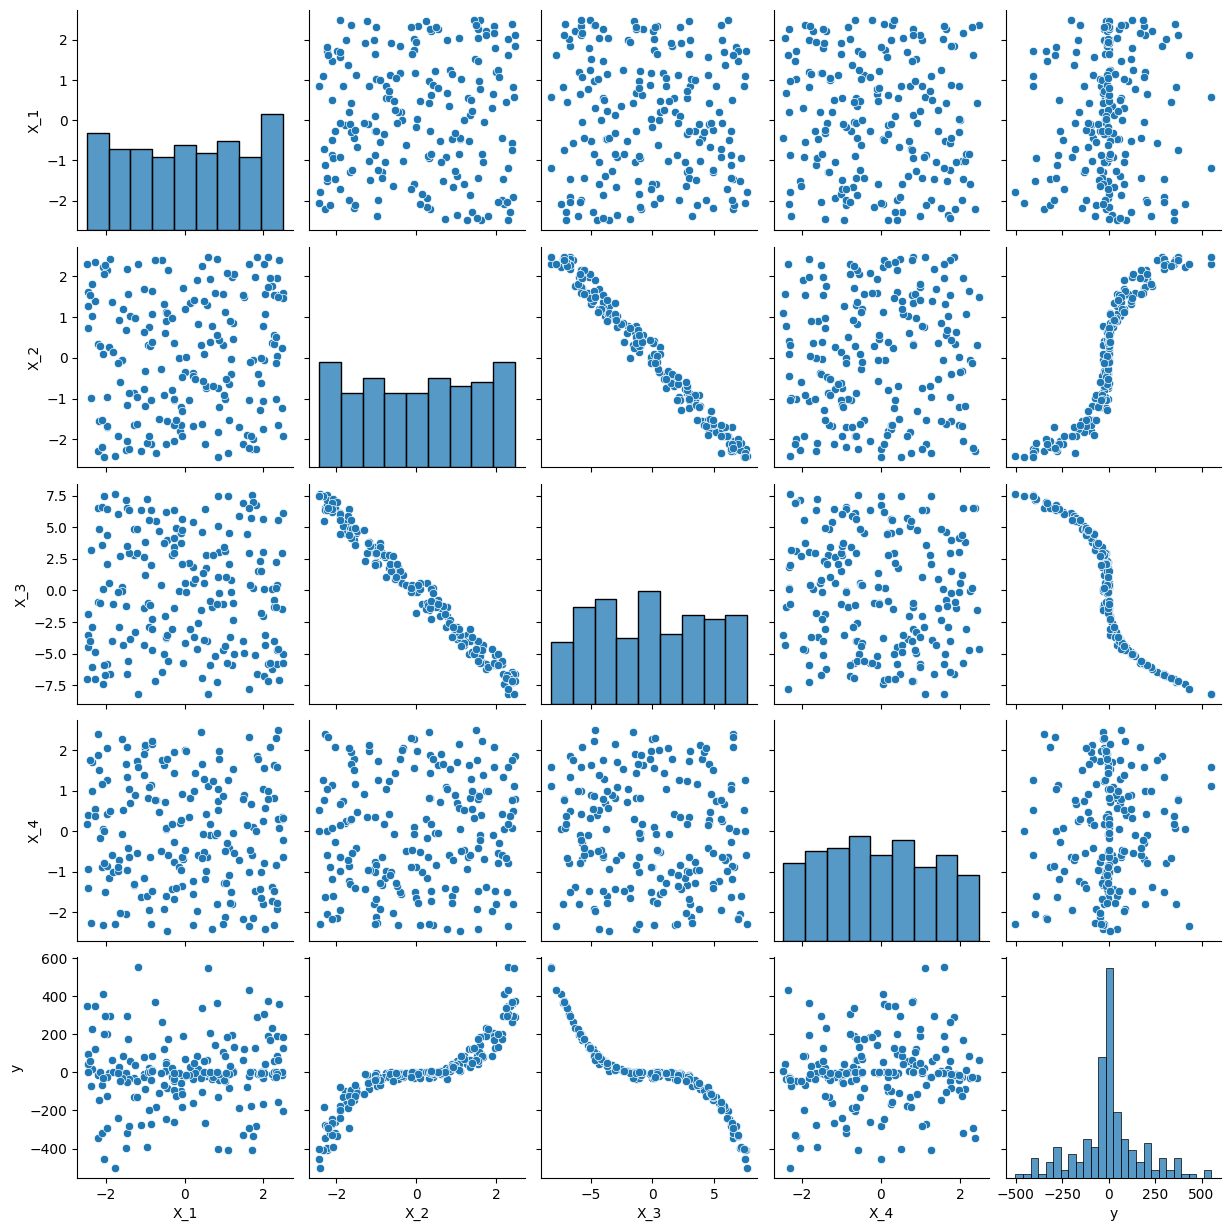

          X_1       X_2       X_3       X_4         y
X_1  1.000000  0.050619 -0.050423 -0.079243  0.067928
X_2  0.050619  1.000000 -0.990740  0.079970  0.893795
X_3 -0.050423 -0.990740  1.000000 -0.095827 -0.911165
X_4 -0.079243  0.079970 -0.095827  1.000000  0.087708
y    0.067928  0.893795 -0.911165  0.087708  1.000000


In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

correlation_matrix = df.corr()
print(correlation_matrix)


Feature X_2 has a strong positive correlation with target variable y, while feature X_3 has a strong negative correlation with target variable y. The correlation between X_2 and X_3 is also strong, linear and negative. This means that X_2 and X_3 are linearly dependent.

## Task 2

### 4.1 Data processing
#### Loading the dataset

In [214]:
import pandas as pd

df = pd.read_csv('pokemon_modified.csv')

#### Exploring the dataset  and removing 2 redundant features

In [215]:
print(df.head())
print(df.info())

redundant_features = ['name', 'classification']  # These features are unlikely to contribute to classification
df.drop(columns=redundant_features, inplace=True)

   against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   
2          1.0           1.0             1.0               0.5            0.5   
3          0.5           1.0             1.0               1.0            0.5   
4          0.5           1.0             1.0               1.0            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   
2            0.5           2.0             2.0            1.0           0.25   
3            1.0           0.5             1.0            1.0           0.50   
4            1.0           0.5             1.0            1.0           0.50   

   ...  hp        name  percenta

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [216]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_legendary'])
y = df['is_legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [217]:
print("Class distribution in the training set:")
print(y_train.value_counts(normalize=True))
print("Class distribution in the test set:")
print(y_test.value_counts(normalize=True))

Class distribution in the training set:
is_legendary
0    0.9125
1    0.0875
Name: proportion, dtype: float64
Class distribution in the test set:
is_legendary
0    0.913043
1    0.086957
Name: proportion, dtype: float64


The dataset is imbalanced because the class distribution is skewed towards non-legendary Pokemon.

#### Checking for missing values and imputing the missing values

In [218]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_imputed = pd.DataFrame(X_train_imputed, columns=X.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X.columns)

#### Double check that there are no missing values

In [219]:
print(X_train_imputed.isnull().sum())


against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64


#### Encode categorically

In [220]:
from sklearn.preprocessing import OneHotEncoder

# Define your data
#data = df[['type1']]  # Assuming 'type1' is the categorical feature in your dataset

# Use OneHotEncoder to perform one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
#onehot = encoder.fit_transform(data)

X_train_encoded = encoder.fit_transform(X_train_imputed[['type1']])
X_test_encoded = encoder.transform(X_test_imputed[['type1']])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['type1']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['type1']))

X_train_final = pd.concat([X_train_imputed.drop(columns=['type1']), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_imputed.drop(columns=['type1']), X_test_encoded_df], axis=1)


# Convert the transformed data back into a DataFrame
#encoded_df = pd.DataFrame(onehot, columns=encoder.get_feature_names_out(['type1']))

# Encode X_train and X_test
##X_train_encoded = encoder.fit_transform(X_train[['type1']])
#X_test_encoded = encoder.transform(X_test[['type1']])


X_test_final.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,2.0,1.0,0.5,1.0,0.0,2.0,2.0,2.0,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,1.0,2.0,0.5,1.0,0.5,0.5,1.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Scale the data

In [221]:
# Define your dataset
from sklearn.preprocessing import MinMaxScaler


data_to_scale = ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
                    'defense', 'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense',
                    'speed', 'weight_kg', 'generation']

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
# Fit and transform on training data
X_train_final[data_to_scale] = scaler.fit_transform(X_train_final[data_to_scale])

# Transform test data using the same scaler fitted on training data
X_test_final[data_to_scale] = scaler.transform(X_test_final[data_to_scale])
#scaled_data = scaler.fit_transform(data_to_scale)

# Convert the scaled data back into a DataFrame
#scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns, index=df.index)

print(X_test_final)

    against_bug against_dark against_dragon against_electric against_fairy  \
0           2.0          2.0            1.0              1.0           1.0   
1           1.0          2.0            1.0              0.5           1.0   
2           1.0          1.0            1.0              2.0           1.0   
3           1.0          1.0            1.0              1.0           1.0   
4           0.5          1.0            2.0              0.5           1.0   
..          ...          ...            ...              ...           ...   
156         1.0          1.0            1.0              2.0           1.0   
157         2.0          2.0            1.0              1.0           1.0   
158         1.0          1.0            1.0              0.0           1.0   
159         0.5          1.0            1.0              1.0           0.5   
160         1.0          1.0            1.0              0.0           1.0   

    against_fight against_fire against_flying against_ghost aga

#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

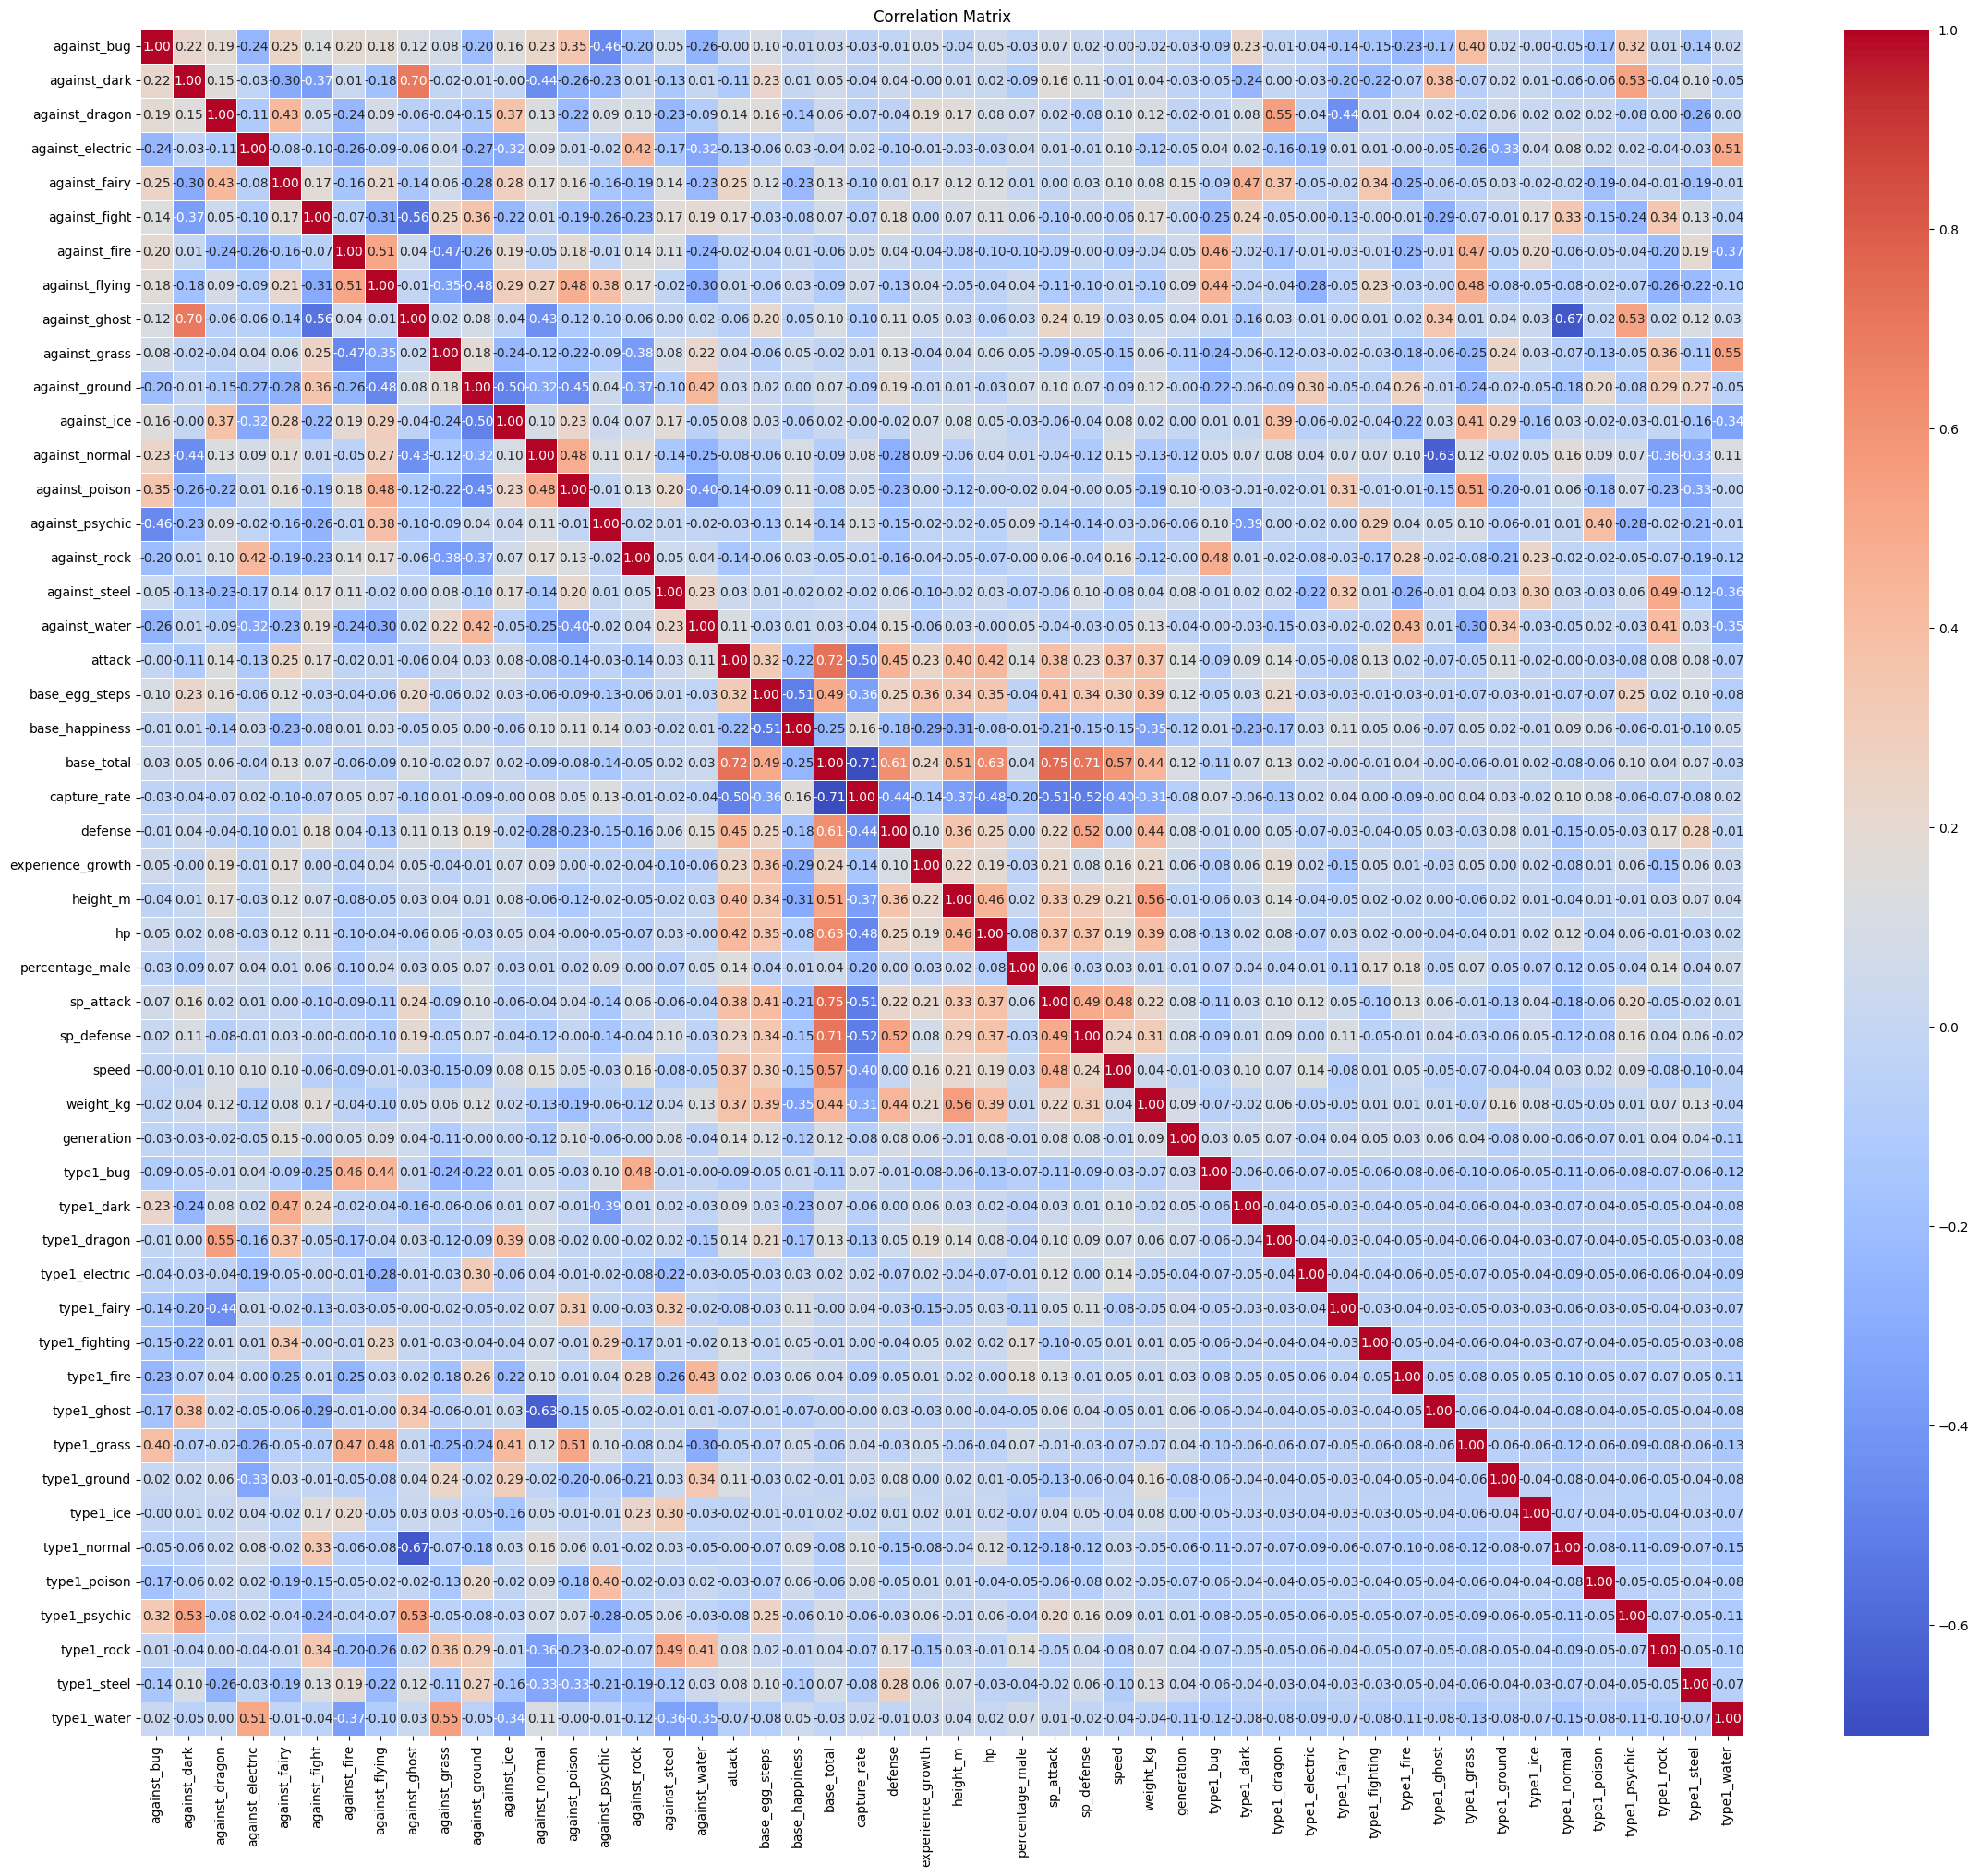

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before computing correlation matrix
#numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric columns
#correlation_matrix = numeric_df.corr()

corr_matrix = X_train_final.corr()

# Plot the correlation matrix
plt.figure(figsize=(28, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### 4.2 Model fitting and Comparison

#### Tuning LR model

In [223]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score 
    
def print_clf_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

In [224]:
from sklearn.linear_model import LogisticRegression

# Specify GridSearchCV as in intruction
# Try different variations with penalty: [’l1’,’l2’]; C: np.logspace(-3,3,7); solver: [’newton-cg’, ’lbfgs’, ’liblinear’], scoring: ’f1’.

parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Instantiate logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Declare and train logistic regression inside GridSearchCV with the parameters above
lr_clf_gs = GridSearchCV(logistic_regression, parameters, scoring='f1', cv=5)
lr_clf_gs.fit(X_train_final, y_train)


c:\Users\jonyz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jonyz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jonyz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jonyz\AppDa

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [226]:
print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy :", lr_clf_gs.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9265201465201465


#### Construct a LR with the best params and Evaluate the LR with the best params

In [227]:
# TODO Write your code here
lr_clf = LogisticRegression(max_iter=1000)
lr_y_pred = lr_clf.fit(X_train_final, y_train).predict(X_test_final)

In [228]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9751552795031055
Precision: 0.9166666666666666
Recall: 0.7857142857142857
F1 Score: 0.8461538461538461


#### Print the top 5 most influencing features and the top 5 ignored features

In [229]:
# Get the coefficients of the logistic regression model
coefficients = lr_clf.coef_[0]

# Create a dataframe with feature names and coefficients
feature_coefficients = pd.DataFrame({'Feature': X_train_final.columns, 'Coefficient': coefficients})

# Sort the dataframe by coefficient values in descending order
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Print the top 5 most influencing features
print("Top 5 most influencing features:")
print(feature_coefficients.head(5))

# Print the top 5 ignored features
print("Top 5 ignored features:")
print(feature_coefficients.tail(5))


Top 5 most influencing features:
              Feature  Coefficient
19     base_egg_steps     4.598668
21         base_total     1.684183
24  experience_growth     1.667676
30              speed     1.150505
18             attack     0.958805
Top 5 ignored features:
           Feature  Coefficient
20  base_happiness    -0.496252
37     type1_fairy    -0.589725
2   against_dragon    -0.628258
44    type1_normal    -0.772636
22    capture_rate    -2.066469


#### Tuning KNN model

In [230]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train knn inside GridSearchCV
# Using GridSearchCV, find best hyper-parameter for the KNN model.
#Try different variations with k :list(range(1, 15)), weights:[’uniform’, ’distance’], metric:[’euclidean’, ’manhattan’, ’chebyshev’, ’cosine’].
param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine'] 
}
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1', cv=5)
knn_clf_gs.fit(X_train_final, y_train)


print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", knn_clf_gs.best_score_)

Tuned Hyperparameters : {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.4470676691729324


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [231]:
# Evaluate the KNN model with the best parameters on the test data using accuracy, precision, recall, and F1 score.
knn_clf = KNeighborsClassifier() 
knn_y_pred = knn_clf.fit(X_train_final, y_train).predict(X_test_final)
print_clf_metrics(y_test, knn_y_pred)

Accuracy: 0.9130434782608695
Precision: 0.5
Recall: 0.07142857142857142
F1 Score: 0.125


#### Fitting GNB to the data and evaluating on the test dataset

In [232]:
from sklearn.naive_bayes import GaussianNB

# Declare and train GaussianNB. No hyperparameters tuning 
# TODO Write your code here
gauss_nb_clf = GaussianNB()
gauss_y_pred = gauss_nb_clf.fit(X_train_final, y_train).predict(X_test_final)

print_clf_metrics(y_test, gauss_y_pred)

Accuracy: 0.937888198757764
Precision: 0.5833333333333334
Recall: 1.0
F1 Score: 0.7368421052631579


#### Which metric is most appropriate for this task and why?

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [233]:
#Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score
print("Logistic Regression:")
print_clf_metrics(y_test, lr_y_pred)
print("\nKNN:")
print_clf_metrics(y_test, knn_y_pred)
print("\nGaussianNB:")
print_clf_metrics(y_test, gauss_y_pred)

Logistic Regression:
Accuracy: 0.9751552795031055
Precision: 0.9166666666666666
Recall: 0.7857142857142857
F1 Score: 0.8461538461538461

KNN:
Accuracy: 0.9130434782608695
Precision: 0.5
Recall: 0.07142857142857142
F1 Score: 0.125

GaussianNB:
Accuracy: 0.937888198757764
Precision: 0.5833333333333334
Recall: 1.0
F1 Score: 0.7368421052631579


## 5. Bonus Task

#### Loading the Dataset

In [234]:
import pandas as pd

# TODO Write your code here
# Load the data from bonus train.csv and bonus test.csv using pandas dataframe and then split the training data to X train and y train, split the test data to X test and y test.
train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

In [235]:
# Split the data
# TODO Write your code here
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(columns=['target']), train_data['target'], test_size=0.2, random_state=123, stratify=train_data['target'])
print(X_train, y_train, X_test, y_test)

          var1      var2        var3
137  22.973339  3.300868  263.508816
269  -5.396278  4.021390  197.347533
38  -18.292081  3.991362  161.999083
200  23.826842  3.031108  207.353666
25   72.643219  3.387506  357.170671
..         ...       ...         ...
69   10.412170  2.376100  317.411277
72    1.487961  4.254343  265.023652
248  39.487397  3.692648  125.065627
194   9.649898  6.707103  149.355570
143  53.408819 -0.258045  275.740450

[216 rows x 3 columns] 137    1
269    0
38     0
200    1
25     2
      ..
69     1
72     1
248    0
194    0
143    2
Name: target, Length: 216, dtype: int64            var1      var2        var3
16    42.077261  4.243367  244.407288
114   54.342510  5.775163  289.798140
86    75.759971  2.567366  402.634507
264   72.746563  3.274326  451.386108
204   89.321010  2.852816  394.763937
12    51.006472  3.073678  284.704639
184   34.853920  2.225322  280.546440
193    1.686992  3.974248  237.503924
101   39.446833  5.139195   96.933398
131   30.2343

####  Plot the data using the pairplot in sns

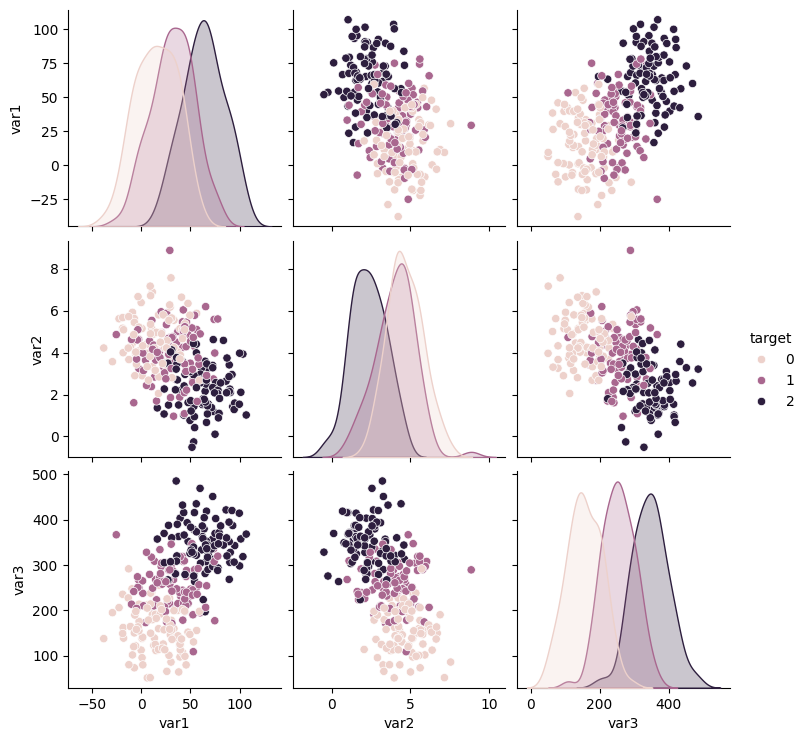

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using seaborn library, plot the training data using the pairplot with kind = ”scatter” and hue=”target”.


sns.pairplot(train_data, kind='scatter', hue='target')
plt.show()



#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [237]:
# TODO Write your code here
ovr_lr = LogisticRegression(multi_class='ovr', max_iter=1000)
ovr_lr.fit(X_train, y_train)
ovr_y_pred = ovr_lr.predict(X_test)


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [238]:
# TODO Write your code here
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train, y_train)
multi_y_pred = multi_lr.predict(X_test)


#### Using gridsearch to tune the C value and multi class

In [239]:
# Use GridSearch to tune the C value of the logistic regression, and the multi class. Use the C: np.logspace(-10, 10,7), multi class : [’multinomial’, ’ovr’]
params = {
    'C': np.logspace(-10, 10, 7),
    'multi_class': ['multinomial', 'ovr']
}
grid_search_clf = GridSearchCV(LogisticRegression(max_iter=1000), params, scoring='f1_macro', cv=5) 
grid_search_clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']},
             scoring='f1_macro')

In [240]:
print("Tuned Hyperparameters :" , grid_search_clf.best_params_)
print("Accuracy :" , grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'ovr'}
Accuracy : 0.849042642933633


#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [241]:
# TODO Write your code here
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000, C=grid_search_clf.best_params_['C'])
multi_lr.fit(X_train, y_train)
multi_y_pred = multi_lr.predict(X_test)

#### Visualize the decision boundaries

c:\Users\jonyz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


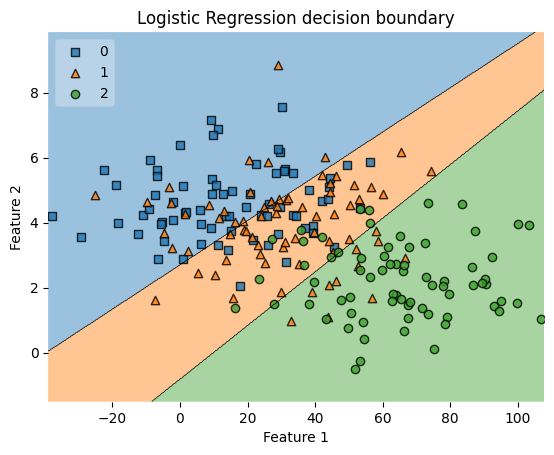

In [242]:
from mlxtend.plotting import plot_decision_regions
# Lastly visualize the decision boundary of the best performing model on the training dataset in 2D. Hint: fit the model on just two features and plot.
# TODO Write your code here
# Fit the model on just two features
multi_lr.fit(X_train[['var1', 'var2']], y_train)
# Plot the decision boundary
plot_decision_regions(X_train[['var1', 'var2']].values, y_train.values, clf=multi_lr, legend=2)
# Adding axes annotations
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?